<a href="https://colab.research.google.com/github/ajithaelavarasan/Renewable_Energy_Prediction/blob/main/Green_Computing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

plt.rcParams["figure.figsize"] = (12, 9)
df = pd.read_csv('drive/My Drive/dataset.csv')
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


**Solar Power Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



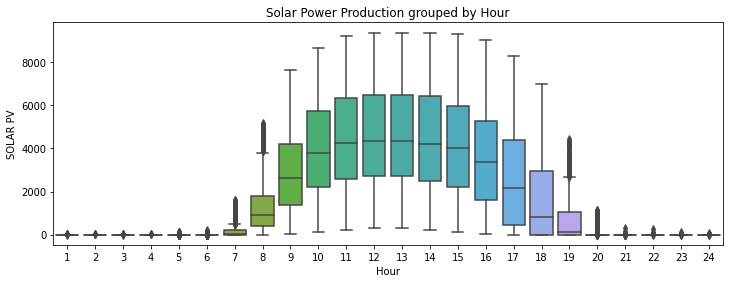

In [ ]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df=df.set_index('TIMESTAMP')
x = df.index
y = df['Solar PV'.upper()]
hour = df['Hour'].astype(int)
plt.subplot(2, 1, 2)
sns.boxplot(hour, y)
plt.title('Solar Power Production grouped by Hour')
plt.show()

**Solar Power Prediction**

Predicting Future Solar Power Production


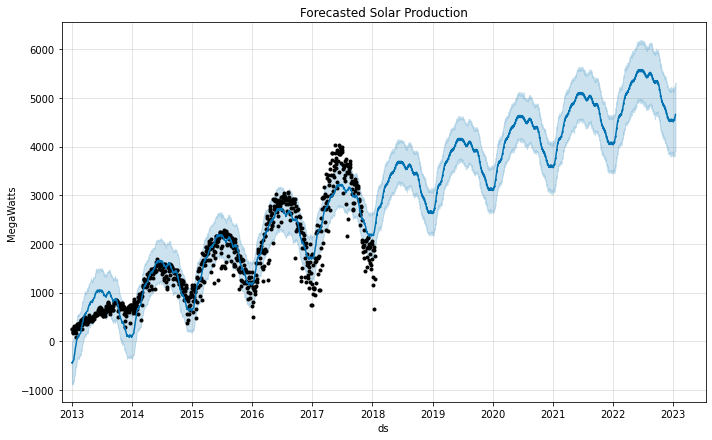

In [ ]:
daily_solar = y.resample('48H').mean()
dd = pd.DataFrame(daily_solar)
dd.reset_index(inplace=True)
dd.columns = ['ds', 'y']
dd = dd[dd['ds'] > '2013']
m = Prophet(daily_seasonality=False)
m.fit(dd)
future = m.make_future_dataframe(periods=365*5)
forecast = m.predict(future)
m.plot(forecast, ylabel='MegaWatts')
plt.title('Forecasted Solar Production')
axes = plt.gca()
axes.set_xlim([pd.to_datetime('11/01/2012'), None])
print('Predicting Future Solar Power Production')

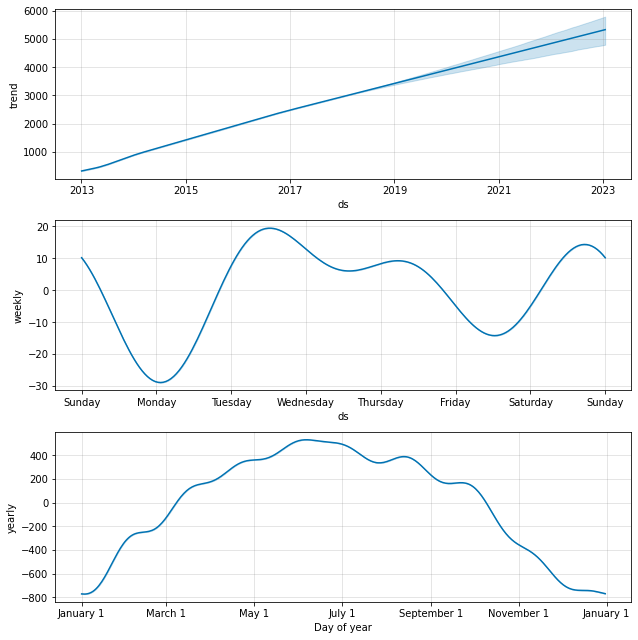

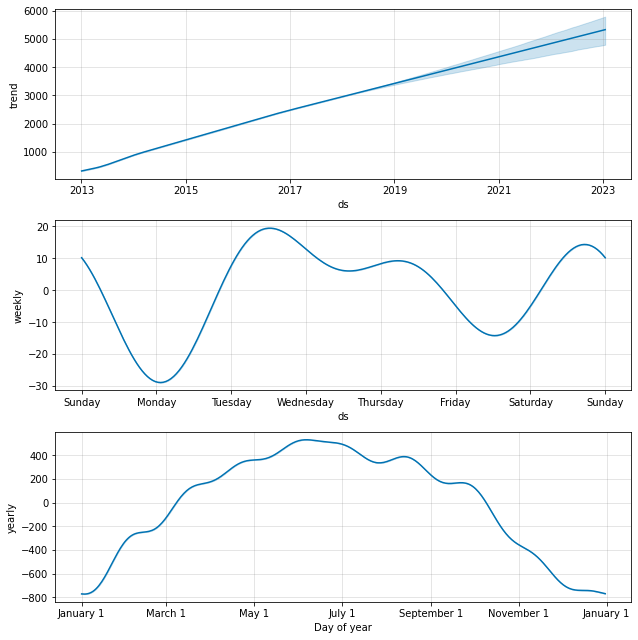

In [ ]:
m.plot_components(forecast)

**ARIMA for Solar Power**

In [ ]:
dd=dd.set_index('ds')
#plt.plot(dd)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 2D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 2D will be used.



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  920
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6352.188
Method:                       css-mle   S.D. of innovations            241.129
Date:                Tue, 20 Oct 2020   AIC                          12718.376
Time:                        08:31:24   BIC                          12752.147
Sample:                    01-04-2013   HQIC                         12731.263
                         - 01-16-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4016      3.354      0.418      0.676      -5.171       7.975
ar.L1.D.y     -0.4232      0.033    -12.834      0.000      -0.488      -0.359
ar.L2.D.y     -0.4723      0.035    -13.360      0.0

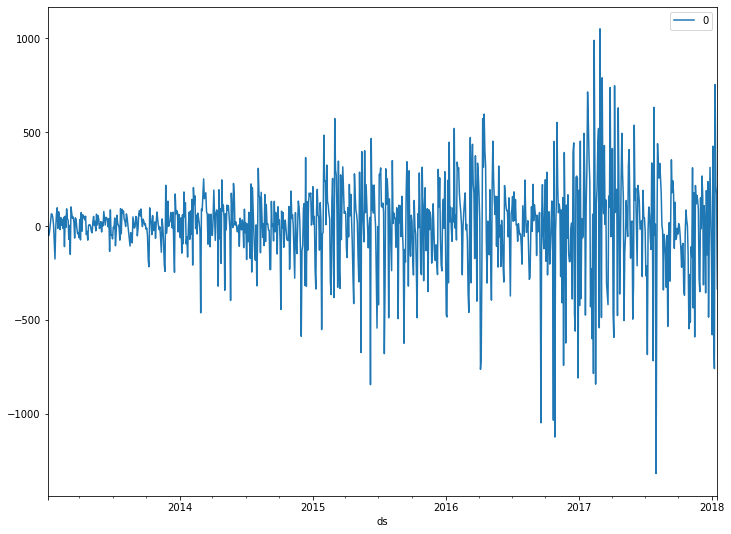

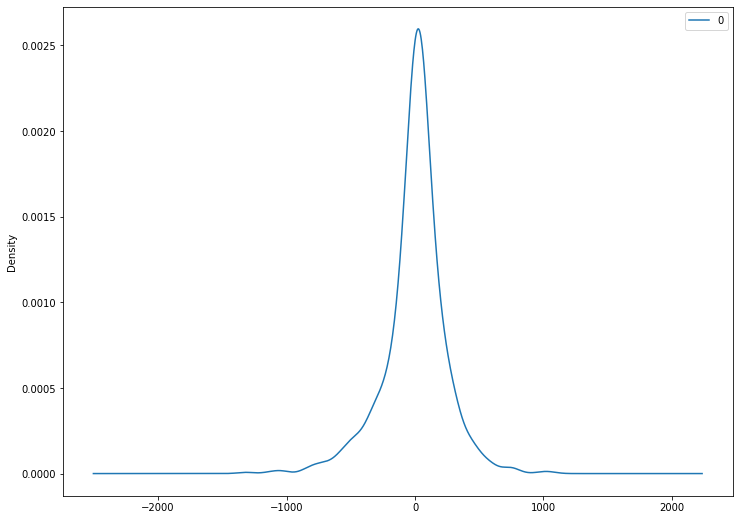

                 0
count   920.000000
mean     -0.053645
std     241.261494
min   -1318.950923
25%     -83.811281
50%      17.112860
75%     107.833773
max    1050.289786


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(dd, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 109397.324


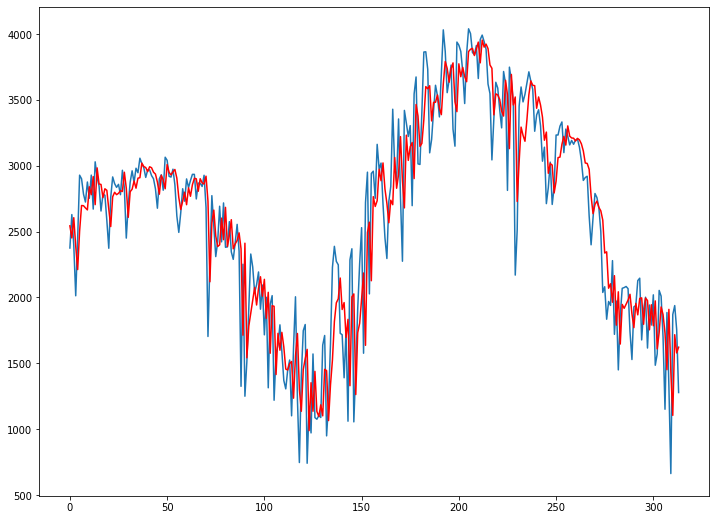

In [ ]:
series = dd
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)


from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Wind Power Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



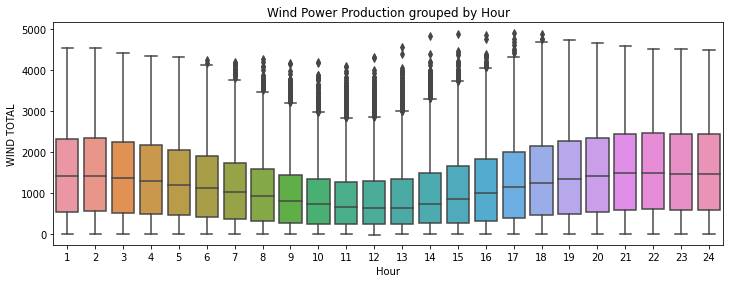

In [ ]:
x = df.index
y = df['Wind Total'.upper()]
hour = df['Hour'].astype(int)
plt.subplot(2, 1, 2)
sns.boxplot(hour, y)
plt.title('Wind Power Production grouped by Hour')
plt.show()

**Wind Power Prediction**

Predicting Future Wind Production


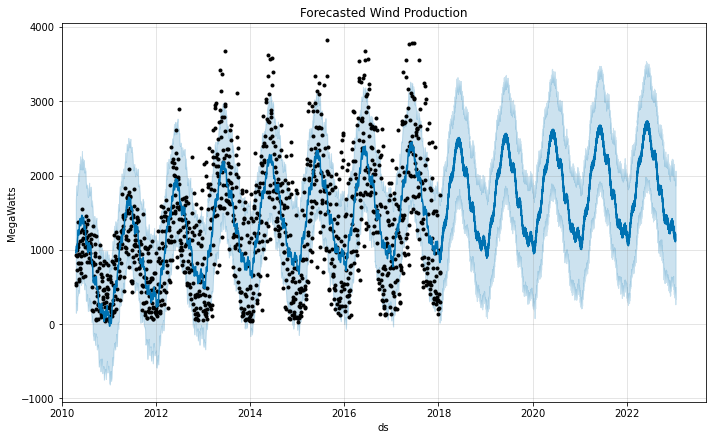

In [ ]:
daily_wind = y.resample('48H').mean()
dd = pd.DataFrame(daily_wind)
dd.reset_index(inplace=True)
dd.columns = ['ds', 'y']
m = Prophet(daily_seasonality=False)
m.fit(dd)
future = m.make_future_dataframe(periods=365*5)
forecast = m.predict(future)
m.plot(forecast, ylabel='MegaWatts')
plt.title('Forecasted Wind Production')
axes = plt.gca()
axes.set_xlim([pd.to_datetime('01/01/2010'), None])
print('Predicting Future Wind Production')

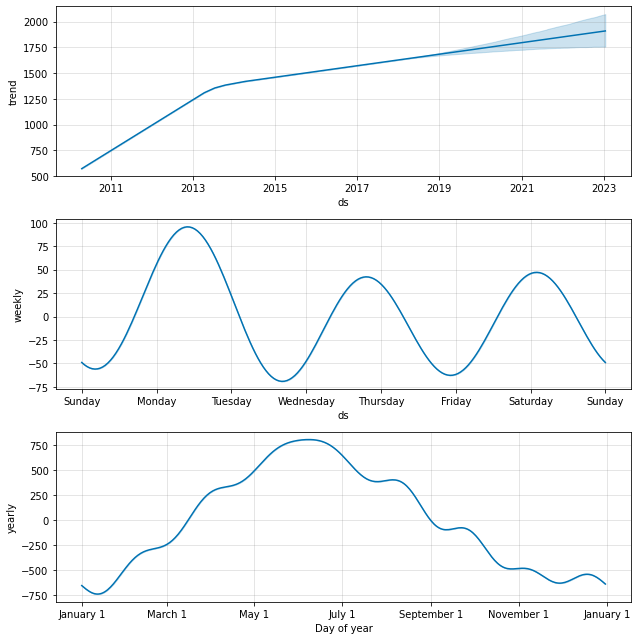

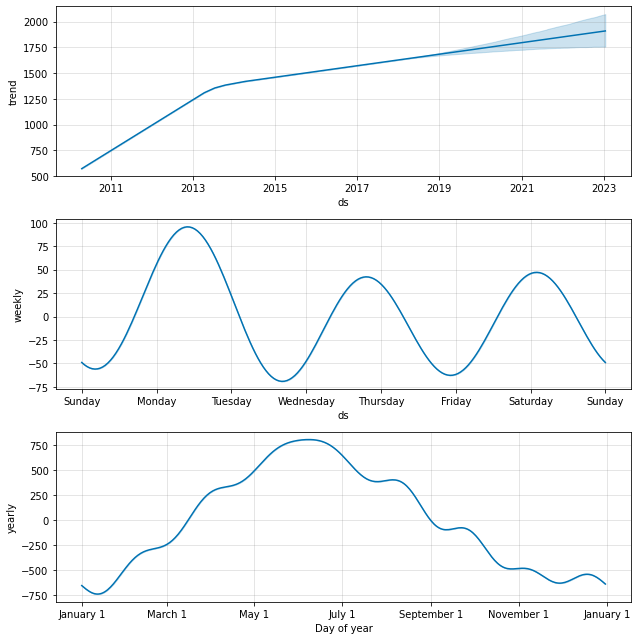

In [ ]:
m.plot_components(forecast)

**ARIMA for Wind Power**

In [ ]:
dd=dd.set_index('ds')
#plt.plot(dd)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 2D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 2D will be used.



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1414
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11111.798
Method:                       css-mle   S.D. of innovations            625.916
Date:                Tue, 20 Oct 2020   AIC                          22237.596
Time:                        08:33:12   BIC                          22274.375
Sample:                    04-22-2010   HQIC                         22251.338
                         - 01-16-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0115      5.817      0.002      0.998     -11.389      11.412
ar.L1.D.y     -0.5413      0.026    -20.527      0.000      -0.593      -0.490
ar.L2.D.y     -0.4961      0.029    -17.150      0.0

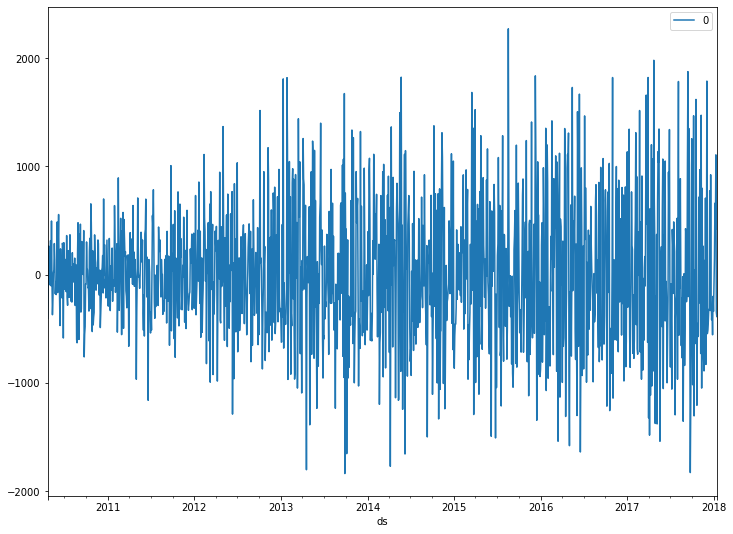

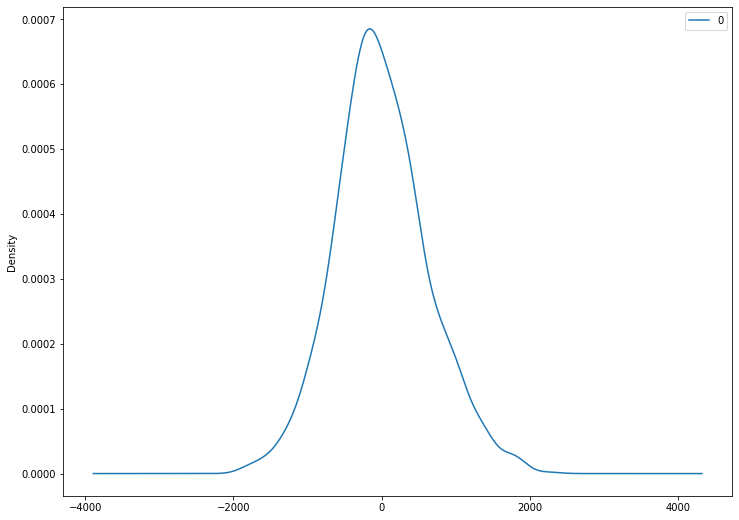

                 0
count  1414.000000
mean     -0.129775
std     626.168446
min   -1837.950682
25%    -406.211714
50%     -47.992163
75%     375.346872
max    2269.004427


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(dd, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 580847.715


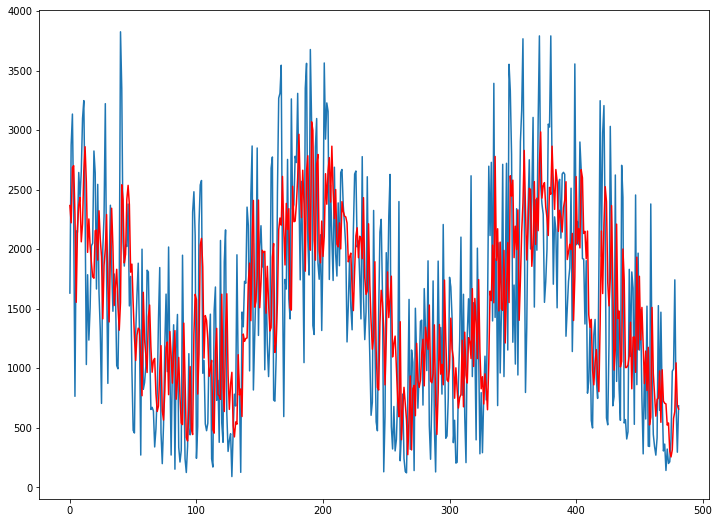

In [ ]:
series = dd
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)


from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()